After a lot of research and letting ideas go, I settled on the Loan Prediction Problem

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

My first choice was to attempt to predict the next big video game trend on youtube for content creators, but I was unable to find a dataset that I could use. If I could find this data, I would prefer to attempt that challenge (I couldn't figure out how to use the data from the Google YouTube 8M, and it looks like it's 31 GBs)

https://research.google.com/youtube8m/

Purpose of Project
---

Using provided data, create a Predictive Model to determine loan approval or denial.

Step 1:

Import and clean data.

In [526]:
#Mount Drive

In [527]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [528]:
#Import cleaning and exploratory mods
#Read in data

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ltest_df = pd.read_csv('/content/loan_test.csv', index_col='Loan_ID')
ltrain_df = pd.read_csv('/content/loan_train.csv', index_col='Loan_ID')

print(ltrain_df.head())
print(ltest_df.head())

         Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
Loan_ID                             ...                                          
LP001002   Male      No          0  ...            1.0         Urban            Y
LP001003   Male     Yes          1  ...            1.0         Rural            N
LP001005   Male     Yes          0  ...            1.0         Urban            Y
LP001006   Male     Yes          0  ...            1.0         Urban            Y
LP001008   Male      No          0  ...            1.0         Urban            Y

[5 rows x 12 columns]
         Gender Married  ... Credit_History Property_Area
Loan_ID                  ...                             
LP001015   Male     Yes  ...            1.0         Urban
LP001022   Male     Yes  ...            1.0         Urban
LP001031   Male     Yes  ...            1.0         Urban
LP001035   Male     Yes  ...            NaN         Urban
LP001051   Male      No  ...            1.0         Urb

In [530]:
#Check data for dtype and nulls in loantrain_df

In [531]:
ltrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [532]:
ltrain_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


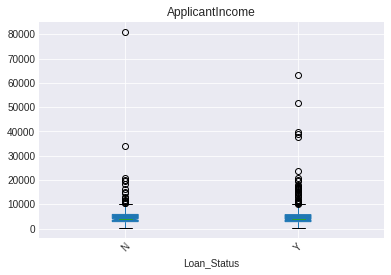

In [533]:
ltrain_df.boxplot(column = ['ApplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

Applicant Income outliers over 30k to be dropped.

In [534]:
ltrain_df = ltrain_df[ltrain_df.ApplicantIncome <= 30000]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


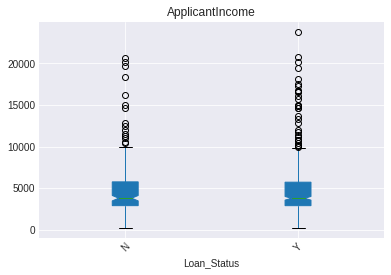

In [535]:
ltrain_df.boxplot(column = ['ApplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


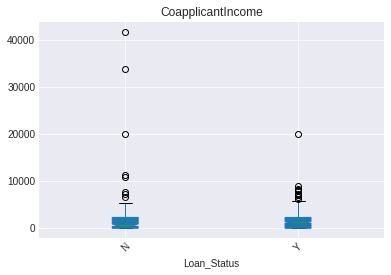

In [536]:
ltrain_df.boxplot(column = ['CoapplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [537]:
ltrain_df = ltrain_df[ltrain_df.CoapplicantIncome < 10000]

Dropping Coappliacte Income to below 20k

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


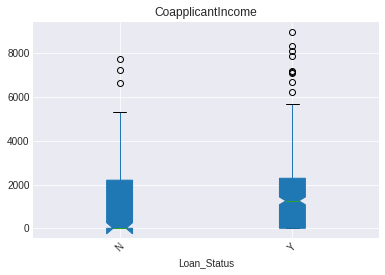

In [538]:
ltrain_df.boxplot(column = ['CoapplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


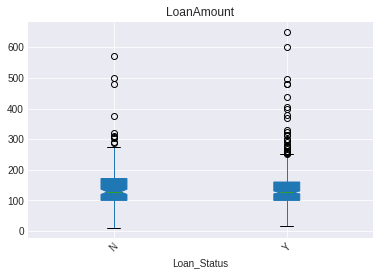

In [539]:
ltrain_df.boxplot(column = ['LoanAmount'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [540]:
ltrain_df = ltrain_df[ltrain_df.LoanAmount > 100]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


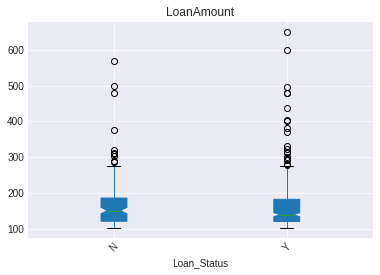

In [541]:
ltrain_df.boxplot(column = ['LoanAmount'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [542]:
ltrain_df.duplicated().any()

False

In [543]:
ltrain_df['Gender'].value_counts()

Male      347
Female     69
Name: Gender, dtype: int64

In [544]:
#Replaced Nulls with majority value
ltrain_df['Gender'].fillna(value = 'Male', inplace = True)
ltrain_df['Gender'].value_counts()

Male      357
Female     69
Name: Gender, dtype: int64

In [545]:
ltrain_df['Married'].value_counts()

Yes    294
No     130
Name: Married, dtype: int64

In [546]:
#Replaced Nulls with No
ltrain_df['Married'].fillna(value = 'No', inplace = True)
ltrain_df['Married'].value_counts()

Yes    294
No     132
Name: Married, dtype: int64

In [547]:
ltrain_df['Dependents'].value_counts()

0     234
2      78
1      73
3+     31
Name: Dependents, dtype: int64

In [548]:
#Replaced Nulls with 0
ltrain_df['Dependents'].fillna(value = '0', inplace = True)
ltrain_df['Dependents'].value_counts()

0     244
2      78
1      73
3+     31
Name: Dependents, dtype: int64

In [549]:
ltrain_df['Education'].value_counts()

Graduate        340
Not Graduate     86
Name: Education, dtype: int64

In [550]:
ltrain_df['Self_Employed'].value_counts()

No     343
Yes     60
Name: Self_Employed, dtype: int64

In [551]:
#Replaced Nulls with No
ltrain_df['Self_Employed'].fillna(value = 'No', inplace = True)
ltrain_df['Self_Employed'].value_counts()

No     366
Yes     60
Name: Self_Employed, dtype: int64

In [552]:
ltrain_df['Property_Area'].value_counts()

Semiurban    161
Rural        144
Urban        121
Name: Property_Area, dtype: int64

In [553]:
ltrain_df['Loan_Status'].value_counts()

Y    298
N    128
Name: Loan_Status, dtype: int64

In [554]:
ltrain_df['Loan_Amount_Term'].value_counts()

360.0    366
180.0     27
480.0     10
300.0      6
84.0       4
60.0       2
240.0      1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [555]:
#Replaced Nulls with majority value
ltrain_df['Loan_Amount_Term'].fillna(value = 360, inplace = True)
ltrain_df['Loan_Amount_Term'].value_counts()

360.0    374
180.0     27
480.0     10
300.0      6
84.0       4
60.0       2
240.0      1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [556]:
ltrain_df['Credit_History'].value_counts()

1.0    328
0.0     64
Name: Credit_History, dtype: int64

In [557]:
#Replaced Nulls with 0
ltrain_df['Credit_History'].fillna(value = 0, inplace = True)
ltrain_df['Credit_History'].value_counts()

1.0    328
0.0     98
Name: Credit_History, dtype: int64

In [558]:
ltrain_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Begin Test dataset cleaning

In [559]:
ltest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [560]:
ltest_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


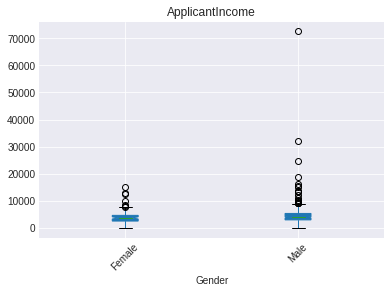

In [561]:
ltest_df.boxplot(column = ['ApplicantIncome'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

Applicant Income outliers over 30k to be dropped, sames as ltrain_df.

Also Obvious Income disparity between genders

In [562]:
ltest_df = ltest_df[ltest_df.ApplicantIncome <= 30000]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


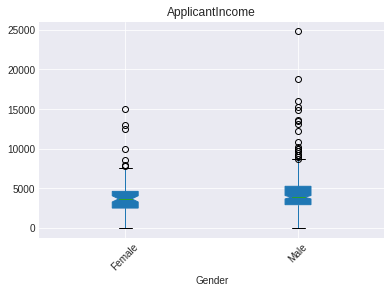

In [563]:
ltest_df.boxplot(column = ['ApplicantIncome'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


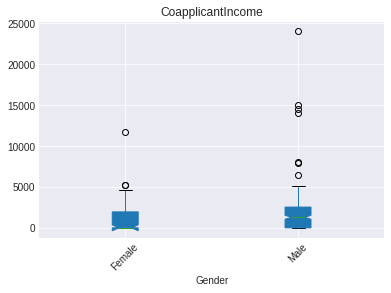

In [564]:
ltest_df.boxplot(column = ['CoapplicantIncome'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [565]:
ltest_df = ltest_df[ltest_df.CoapplicantIncome < 10000]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


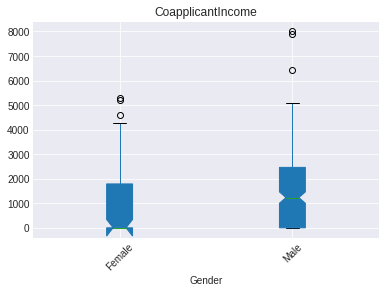

In [566]:
ltest_df.boxplot(column = ['CoapplicantIncome'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


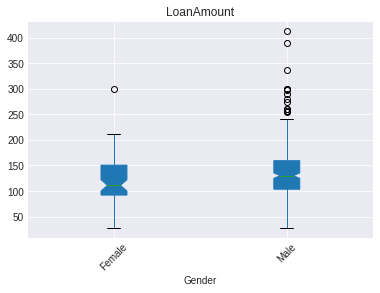

In [567]:
ltest_df.boxplot(column = ['LoanAmount'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [568]:
ltest_df = ltest_df[ltest_df.LoanAmount > 100]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


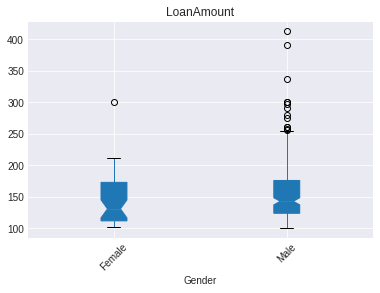

In [569]:
ltest_df.boxplot(column = ['LoanAmount'], by='Gender', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [570]:
ltest_df.duplicated().any()

True

In [571]:
ltest_df.duplicated().sum()

1

In [572]:
ltest_df.drop_duplicates(inplace = True)
ltest_df.duplicated().any()

False

In [573]:
ltest_df.shape

(263, 11)

In [574]:
ltest_df['Gender'].value_counts()

Male      209
Female     45
Name: Gender, dtype: int64

In [575]:
#Replaced Nulls with majority value
ltest_df['Gender'].fillna(value = 'Male', inplace = True)
ltest_df['Gender'].value_counts()

Male      218
Female     45
Name: Gender, dtype: int64

In [576]:
ltest_df['Married'].value_counts()

Yes    178
No      85
Name: Married, dtype: int64

In [577]:
ltest_df['Dependents'].value_counts()

0     144
2      47
1      38
3+     29
Name: Dependents, dtype: int64

In [578]:
#Replaced Nulls with 0
ltest_df['Dependents'].fillna(value = '0', inplace = True)
ltest_df['Dependents'].value_counts()

0     149
2      47
1      38
3+     29
Name: Dependents, dtype: int64

In [579]:
ltest_df['Education'].value_counts()

Graduate        207
Not Graduate     56
Name: Education, dtype: int64

In [580]:
ltest_df['Self_Employed'].value_counts()

No     219
Yes     26
Name: Self_Employed, dtype: int64

In [581]:
#Replaced Nulls with No
ltest_df['Self_Employed'].fillna(value = 'No', inplace = True)
ltest_df['Self_Employed'].value_counts()

No     237
Yes     26
Name: Self_Employed, dtype: int64

In [582]:
ltest_df['Property_Area'].value_counts()

Urban        99
Semiurban    84
Rural        80
Name: Property_Area, dtype: int64

In [583]:
ltest_df['Loan_Amount_Term'].value_counts()

360.0    231
180.0     11
300.0      6
480.0      4
84.0       2
36.0       1
350.0      1
12.0       1
60.0       1
240.0      1
Name: Loan_Amount_Term, dtype: int64

In [584]:
#Replaced Nulls with majority value
ltest_df['Loan_Amount_Term'].fillna(value = 360, inplace = True)
ltest_df['Loan_Amount_Term'].value_counts()

360.0    235
180.0     11
300.0      6
480.0      4
84.0       2
36.0       1
350.0      1
12.0       1
60.0       1
240.0      1
Name: Loan_Amount_Term, dtype: int64

In [585]:
ltest_df['Credit_History'].value_counts()

1.0    198
0.0     48
Name: Credit_History, dtype: int64

In [586]:
#Replaced Nulls with 0
ltest_df['Credit_History'].fillna(value = 0, inplace = True)
ltest_df['Credit_History'].value_counts()

1.0    198
0.0     65
Name: Credit_History, dtype: int64

In [587]:
ltest_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Step 2:

Examine and Visualize Data

The percentage of Yes :  69.95 %
The percentage of No :  30.049999999999997 %


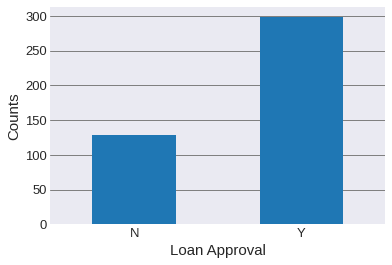

In [588]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False)
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('')
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Loan Approval', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);


print('The percentage of Yes : ', round((ltrain_df['Loan_Status'].value_counts(normalize = True)[0]), 4)*100, '%')
print('The percentage of No : ', round((ltrain_df['Loan_Status'].value_counts(normalize = True)[1]), 4)*100, '%');

~70% of loans are approved

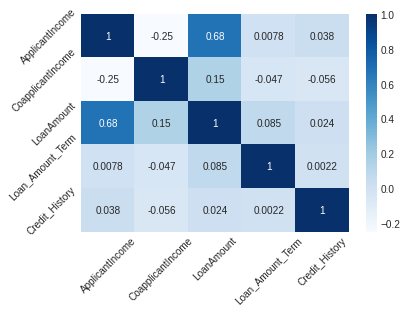

In [589]:
#Correlations in data
corr = ltrain_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45);

The only 2 columns that have a strong correlation are Loan Amount and Applicant Income

Those with a Credit history had a much greater chance of having their loan approved.

The percentage of Females approved :  67.0 %
The percentage of Females not approved :  33.0 %
The percentage of Males approved :  71.0 %
The percentage of Males not approved :  28.999999999999996 %


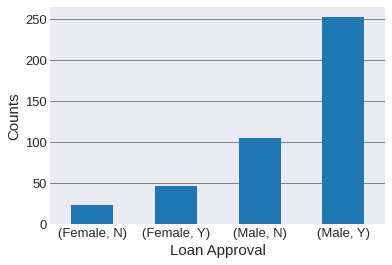

In [590]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Gender', 'Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False)
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('')
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Loan Approval', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

female = ltrain_df['Gender'] == 'Female'
male = ltrain_df['Gender'] == 'Male'
f_df = ltrain_df[female]
m_df = ltrain_df[male]

print('The percentage of Females approved : ', round((f_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Females not approved : ', round((f_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of Males approved : ', round((m_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Males not approved : ', round((m_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

Step 3: Modeling preperation

In [591]:
ltrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             426 non-null    object 
 1   Married            426 non-null    object 
 2   Dependents         426 non-null    object 
 3   Education          426 non-null    object 
 4   Self_Employed      426 non-null    object 
 5   ApplicantIncome    426 non-null    int64  
 6   CoapplicantIncome  426 non-null    float64
 7   LoanAmount         426 non-null    float64
 8   Loan_Amount_Term   426 non-null    float64
 9   Credit_History     426 non-null    float64
 10  Property_Area      426 non-null    object 
 11  Loan_Status        426 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 43.3+ KB


In [592]:
ltr_df = pd.get_dummies(ltrain_df, columns= ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

In [593]:
dep = {'0' : 0, '1': 1, '2': 2, '3+': 3}
ltr_df['Dependents'] = ltr_df['Dependents'].map(dep)
ltr_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,
LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
LP001014,3,3036,2504.0,158.0,360.0,0.0,N,0,1,0,1,1,0,1,0,0,1,0
